<div class='alert alert-info'>
        <h1>
            <center>
                <font color='Darkblue'>Random Forest Classification</font>
            </center>
        </h1>
        
</div>

        Random Forest is an Ensemble Learning Method that builds multiple decision trees and combines their outputs for better accuracy and robustness.It is a powerful classification algorithm that handles non-linearity ,overfitting and high-dimentional data effectively.
        
##### <font color='green'>Type:</font> Supervised Learning (Classification & Regression)
##### <font color='green'>Base Model:</font> Decision Tree
##### <font color='green'>Ensemble Technique:</font> Bagging (Bootstrap Aggregating)
##### <font color='green'>Works Well With:</font> Large datasets, high-dimensional data, and missing values.


        Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
        
        Then it gets prediction from each tree and by means of majority voting,it selects the decision which gets the majority vote.

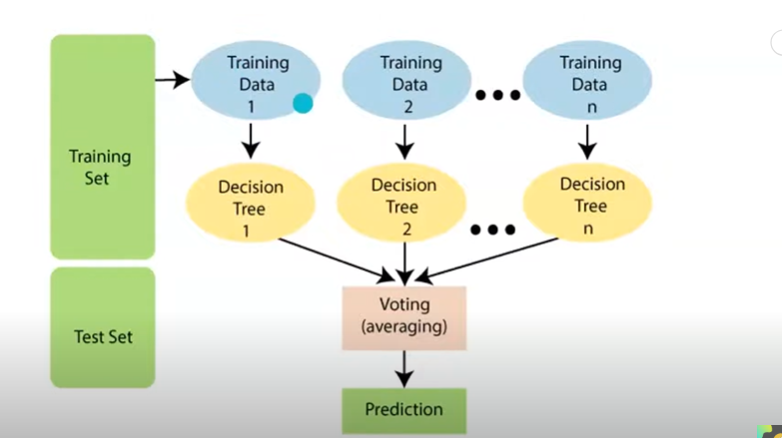

In [1]:
from PIL import Image
Image.open('s166.png')

        Here we have taken n training data sets with having defferent row + column samples,that means ,if first tree takes certain cloumns and rows and another will take other columns and rows and also some of them from previous sample ...It should like that.,in decision tree there is a diffetent samples of data.

# <font color='#FF33A1'> Steps for Random Forest algorithm<font>

## <font color='Darkblue'>Step 1: </font>
        Pick at random K data points from the traning set.
## <font color='Darkblue'>Step 2: </font>
            Build the Decision tree associated with these K data Points
## <font color='Darkblue'>Step 3: </font>
        Choose the number of NTrees you want to build and repeat step1 & step2
## <font color='Darkblue'>Step 4: </font>
        For a New data Point,Make each one of your Ntree trees Predict the category to which the data points belongs and assign the new data point to the category that with the majority vote.


# <font color='#FF33A1'>🔹 How Does Random Forest Work?</font>
## <font color='Darkblue'>Bootstrap Sampling:</font>
        The dataset is randomly sampled multiple times (with replacement) to create different subsets.
## <font color='Darkblue'>Train Multiple Decision Trees:</font> 
        Each subset is used to train an independent Decision Tree.
## <font color='Darkblue'>Majority Voting:</font> 
                    For classification, the final class is determined by the majority vote from all trees.
## <font color='Darkblue'>Reduces Overfitting: </font>
        Since it aggregates multiple models, Random Forest is less prone to overfitting than a single Decision Tree.

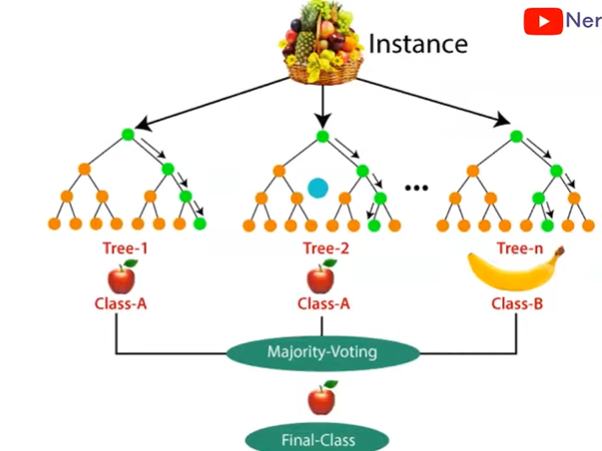

In [2]:
Image.open('s167.png')

# <font color='#FF33A1'>Applications</font>
        1.Banking : Banking sector mostly uses this algorithm for the identification of loan risk.
        
        2.Medicine :with the help of this algorithm,disease trends and risks of the disease can be identified.
        
        3.Land Use : We can Identity the areas of similar land use by this algorithm.
        
        4.Marketing : Marketing trends can be identified Using this algorithms.

<div class='alert alert-info'>
    <h1>
        <center>
            <font color='Darkblue'> Implementation of Random Forest Classifier</font>
        </center>
    </h1>
</div>

# Step 1: Import Required Libraries



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 2: Load Dataset

In [37]:
# Load dataset (replace with your dataset)
df = pd.read_csv("AusDataForRainPred.csv")
df.head()

#Here we have taken the dataset called Austrilian



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Step 3: Data Preprocessing</font>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [39]:
# Percentage of null values in the entire dataset
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

        If see Here we have lot null values and noise data is there so,we need to remove those null or else fill with using some statics if possible

             IF the data have less then 25 or 30 Percentage of null values we can replace with any mean or median but some columns have very high null values ,so we simply remove those columns for better accuarcy getting sometimes those columns also important but we can't add 40% null values there may be a chance to overfiting.

In [40]:
df.drop(columns=['Location','Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True) # we are removing the columns which we have more then 30% of null values.
df


,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [41]:

#checking for duplicates
df.duplicated().sum()

1

In [28]:
df.shape

(145460, 18)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   142193 non-nul

In [42]:
df['Date'].value_counts()

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

        So,Here we do need a Data Feature related to target varible becuase using date we can't say that rain will come or not based on the seasons and other related features we can say. For Example in india (Mansson season from july to agust)

In [43]:
from datetime import datetime

In [44]:
 # df = pd.DataFrame({'Date': ['2013-11-12', '2008-05-22', '2010-12-30']})

# Extract only the month name
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%b')



In [45]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Dec,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Dec,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Dec,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Dec,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Dec,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [48]:
df.rename(columns=({'Date':'Month'}))


,Month,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Dec,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Dec,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Dec,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Dec,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Dec,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Jun,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Jun,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Jun,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Jun,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


        Here we have taken only months instead of Year Becuase we can say in these Months we will expect the rain will come ,that's why we are keeping these Month column ,Mostly we can't say through the months also...

In [49]:
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Dec,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Dec,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Dec,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Dec,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Dec,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Jun,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Jun,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Jun,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Jun,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [50]:
for i in df.select_dtypes('object'):
    count=df[i].value_counts()
    Null=df[i].isnull().sum()/len(df)*100
    print(f"Value_counts {i} :",count)
    print()
    print(f"Null values in % {i}:", Null)
    print("\n===========================")

    # Here we have every object checks the value counts and null percentages and all for conversion

Value_counts Date : Date
Mar    13361
May    13353
Jan    13236
Jun    12684
Aug    12028
Oct    12028
Jul    12025
Nov    11669
Sep    11640
Apr    11550
Dec    11093
Feb    10793
Name: count, dtype: int64

Null values in % Date: 0.0

Value_counts WindGustDir : WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

Null values in % WindGustDir: 7.098858792795271

Value_counts WindDir9am : WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

Null values in % WindDir9am: 7.263852605527293

Value_counts WindDir3pm : WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8

In [53]:
for i in df.columns:
    if df[i].isnull().sum() / len(df) * 100 < 2:  # Check if missing values are less than 2%
        df[i].dropna(inplace=True)

        # Here we have delated which clumns have less 2% null values I just simply deleted that to also

        

In [54]:
df.isnull().sum()

Date                 0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [55]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Dec,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Dec,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Dec,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Dec,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Dec,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [64]:
df.select_dtypes('object').isnull().sum()

Date           145459
WindGustDir    145459
WindDir9am     145459
WindDir3pm     145459
dtype: int64

In [61]:
# Convert 'RainToday' and 'RainTomorrow' from 'Yes'/'No' to 1/0
for i in ['RainToday', 'RainTomorrow']:
    df[i] = df[i].map({'No': 0, 'Yes': 1})

# I have changed the target variables into numerical 

In [62]:
for i in ['RainToday','RainTomorrow']:
    count=df[i].value_counts()
    Null=df[i].isnull().sum()/len(df)*100
    print(f"Value_counts {i} :",count)
    print()
    print(f"Null values in % {i}:", Null)
    print("\n===========================")

Value_counts RainToday : RainToday
0    145460
Name: count, dtype: int64

Null values in % RainToday: 0.0

Value_counts RainTomorrow : RainTomorrow
0    145460
Name: count, dtype: int64

Null values in % RainTomorrow: 0.0



In [19]:
for i in ['RainToday','RainTomorrow']:
    count=df[i].value_counts()
    Null=df[i].isnull().sum()/len(df)*100
    print(f"Value_counts {i} :",count)
    print()
    print(f"Null values in % {i}:", Null)
    print("\n===========================")

Value_counts RainToday : RainToday
0    43958
1    12462
Name: count, dtype: int64

Null values in % RainToday: 0.0

Value_counts RainTomorrow : RainTomorrow
0    43993
1    12427
Name: count, dtype: int64

Null values in % RainTomorrow: 0.0



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Temp9am

In [21]:
# List of categorical columns to convert
categorical_columns = ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Convert each column using `.astype('category')` and `.cat.codes`
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes


KeyError: 'Date'

In [ ]:
df.head()

In [102]:
df.shape

(112925, 18)

In [103]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

        Succesffully we have removed null valuesand converted the data into numerical

        Here we don't need to delete outliers Because raining fall only happpens in certain only if we delete those outliers the model can't understand properly.

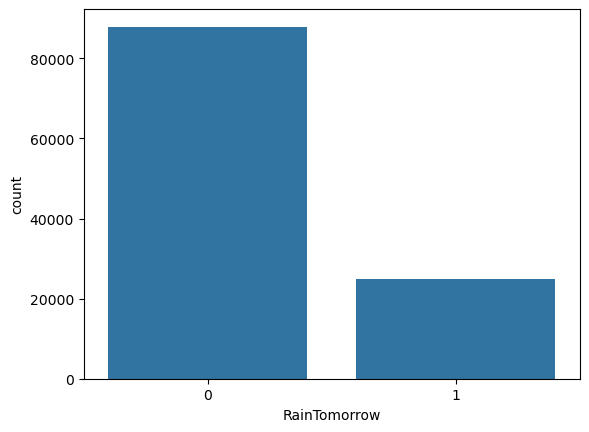

In [104]:
sns.countplot(data=df,x='RainTomorrow')
plt.show()

        Here the target variable quite looking like a imbalanced data set,that the may causes for overfitting 

In [1]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

NameError: name 'df' is not defined